In [32]:
import numpy as np
import matplotlib.pyplot as plt

from py import ldpc # LDPC from Jossy

In [18]:
c = ldpc.code(standard = '802.11n', rate = '1/2', z=27)

print("LDPC PARAMETERS\n===============")

print("Info length: ", c.K)
print("Codeword length: ", c.N)


LDPC PARAMETERS
Info length:  324
Codeword length:  648


In [19]:
def success(a, b):
    """find the percentage difference between two lists"""
    successes = 0

    for index, i in enumerate(a):
        if i == b[index]:
            successes += 1 / len(a)

    return successes

def flip_bits(a, error_rate: float):
    """flip error_rate bits in a, when error_rate is between 0 and 1"""
    b = np.zeros(len(a))

    for index, i in enumerate(a):
        if np.random.random() < error_rate: # Flip error_rate % of the bits
            b[index] = (i + 1) % 2
        else:
            b[index] = i
    
    return b

# CHECK:

e = np.random.randint(0, 2, c.K)
d = flip_bits(e, 0.05)
print(success(e, d)) # Should be about 0.95


0.950617283950621


In [47]:
success_measurements = {}

for error_rate in [0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11]:

    success_measurements[error_rate] = []

    for i in range(500):
        data = np.random.randint(0, 2, c.K) 
        to_transmit = c.encode(data) # encode with LDPC

        received = flip_bits(to_transmit, error_rate) # simulate channel

        received = 10 * (0.5 - received)
        decoded, iters = c.decode(received) # decode with LDP

        decoded = decoded[:-(c.K)] # still no idea what the rest of decoded does...
        decoded = np.array([1 if i < 0 else 0 for i in decoded]) # ldpc returns probabilities I think? so convert back to bits

        success_measurements[error_rate].append(success(decoded, data))

0.03 : Average -  1.0000000000000036  Minimum -  1.0000000000000038
0.04 : Average -  1.0000000000000036  Minimum -  1.0000000000000038
0.05 : Average -  1.0000000000000036  Minimum -  1.0000000000000038
0.06 : Average -  0.9995864197530901  Minimum -  0.8765432098765465
0.07 : Average -  0.9969753086419789  Minimum -  0.8734567901234601
0.08 : Average -  0.9790802469135839  Minimum -  0.8117283950617314
0.09 : Average -  0.9356728395061764  Minimum -  0.7962962962962993
0.1 : Average -  0.8881111111111145  Minimum -  0.7777777777777807
0.11 : Average -  0.8578703703703736  Minimum -  0.7623456790123485


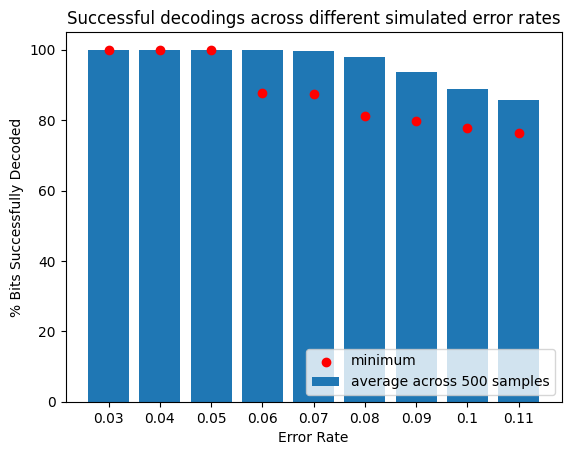

In [56]:
# DATA PROCESSING

for i in success_measurements:
    print(i, ": Average - ", np.mean(success_measurements[i]), " Minimum - ", np.min(success_measurements[i]))

means = 100 * np.array([np.mean(success_measurements[key]) for key in success_measurements])
mins = 100 * np.array([np.min(success_measurements[key]) for key in success_measurements])

plt.bar(range(len(success_measurements)), means, align='center', label="average across 500 samples")
plt.xticks(range(len(success_measurements)), success_measurements.keys())

plt.scatter(np.arange(len(mins)), mins, color='red', label="minimum")

plt.ylabel("% Bits Successfully Decoded")
plt.xlabel("Error Rate")
plt.title("Successful decodings across different simulated error rates")

plt.legend(loc="lower right")
plt.show()